# Decision Tree with the Iris Dataset

For an explanation of decision trees, see [our course notes](https://jennselby.github.io/MachineLearningCourseNotes/#decision-trees).

This notebook uses example code from http://scikit-learn.org/stable/modules/tree.html.

## Instructions
0. If you haven't already, follow [the setup instructions here](https://jennselby.github.io/MachineLearningCourseNotes/#setting-up-python3) to get all necessary software installed.
0. Install the software specific to this notebook, as explained in the [Setup](#Setup) section.
0. Read through the code in the following sections:
    * [Iris Dataset](#Iris-Dataset)
    * [Visualization of Dataset](#Visualization-of-Dataset)
    * [Model Training](#Model-Training)
    * [Visualization of Model Output](#Visualization-of-Model-Output)
    * [Prediction](#Prediction)
0. Complete one or both exercise options:
    * [Exercise Option #1 - Standard Difficulty](#Exercise-Option-#1---Standard-Difficulty)
    * [Exercise Option #2 - Advanced Difficulty](#Exercise-Option-#2---Advanced-Difficulty)

## Setup

Before you can run this code, you will need to install some extra software.

1. Install homebrew (if you don't already have it) following the [directions on their site](https://brew.sh/).
1. Install the graphviz library that will let us visualize the decision tree. In Terminal, run
>`brew install graphviz`
1. Install the pydot library that allows you to call graphviz from Python. In Terminal run
>`pip3 install pydot`.

In [9]:
from sklearn.datasets import load_iris # the iris dataset is included in scikit-learn
from sklearn import tree # for fitting our model

# these are all needed for the particular visualization we're doing
from six import StringIO
import pydot
import os.path

# to display graphs in this notebook
%matplotlib inline
import matplotlib.pyplot

## Iris Dataset

Before you go on, make sure you understand this dataset. Modify the cell below to examine different parts of the dataset that are contained in the 'iris' dictionary object.

What are the features? What are we trying to classify?

In [29]:
iris = load_iris()
iris.keys()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

You can also try looking at it using a [pandas dataframe](https://jennselby.github.io/MachineLearningCourseNotes/#pandas).

In [11]:
import pandas
iris_df = pandas.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df['target'] = [iris.target_names[target] for target in iris.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualization of Dataset

Let's visualize our dataset, so that we can better understand what it looks like.

Change the first two variables to change which features you are looking at.

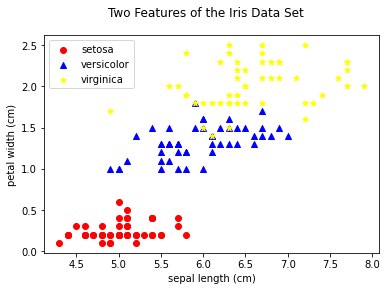

In [21]:
# Plot two of the features (the first and fourth columns, in this case)
x1_feature = 0
x2_feature = 3

x1 = iris.data[:,x1_feature]
x2 = iris.data[:,x2_feature]

# The data are in order by type. Find out where the other types start
start_type_one = list(iris.target).index(1)
start_type_two = list(iris.target).index(2)

# create a figure and label it
fig = matplotlib.pyplot.figure()
fig.suptitle('Two Features of the Iris Data Set')
matplotlib.pyplot.xlabel(iris.feature_names[x1_feature])
matplotlib.pyplot.ylabel(iris.feature_names[x2_feature])

# put the input data on the graph, with different colors and shapes for each type
scatter_0 = matplotlib.pyplot.scatter(x1[:start_type_one], x2[:start_type_one],
                                      c="red", marker="o", label=iris.target_names[0])
scatter_1 = matplotlib.pyplot.scatter(x1[start_type_one:start_type_two], x2[start_type_one:start_type_two],
                                      c="blue", marker="^", label=iris.target_names[1])
scatter_2 = matplotlib.pyplot.scatter(x1[start_type_two:], x2[start_type_two:],
                                      c="yellow", marker="*", label=iris.target_names[2])

# add a legend to explain which points are which
matplotlib.pyplot.legend(handles=[scatter_0, scatter_1, scatter_2])

# show the graph
matplotlib.pyplot.show()

## Model Training

Next, we want to fit our decision tree model to the iris data we're using.

In [22]:
# Train the model
model = tree.DecisionTreeClassifier()
model.fit(iris.data, iris.target)

DecisionTreeClassifier()

## Visualization of Model Output

Using graphviz and pydot, we can create a flowchart that shows the model decisions. The flowchart will be printed to a PDF on your desktop.

In [23]:
dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data, feature_names=iris.feature_names, class_names=iris.target_names,
                     filled=True, rounded=True, special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
graph.write_pdf(os.path.expanduser("~/Desktop/iris_decision_tree.pdf"))

## Prediction

Now we can make some predictions using the trained model. We'll pull out some examples from our training data and see what the model says about them.

In [24]:
# Use the first input from each class
inputs = [iris.data[0], iris.data[start_type_one], iris.data[start_type_two]]

print('Class predictions: {0}'.format(model.predict(inputs))) # guess which class
print('Probabilities:\n{0}'.format(model.predict_proba(inputs))) # give probability of each class

Class predictions: [0 1 2]
Probabilities:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# Exercise Option #1 - Standard Difficulty

Answer the following questions. You may find it helpful to compare the PDF output to the graph above (remember you can change which columns the graph is displaying), to see the boundaries the decision tree is finding.

1. According to the PDF, what feature values would tell you with high probability that you were looking at a setosa iris?
1. According to the PDF, which features would you look at to tell a virginica from a versicolor?
1. What is the value array in the PDF showing?
1. The predictions just above are all 100% confident in the correct answer. If you try using other data points from the training data, you'll find the same thing. Why is that always true for our Decision Tree?
1. Try using subsets of the input data (look at the iris_inputs variable in [LogisticRegressionIris](https://nbviewer.jupyter.org/github/jennselby/MachineLearningCourseNotes/blob/master/assets/ipynb/LogisticRegressionIris.ipynb) to see how to use only some of the columns in the model). How does this change the decision tree?

1. Petal width of less than or equal to 0.8 cm
2. Petal width mostly, although sepal length is also good. Petal length is less reliable.
3. At each node, what branch should be taken based on certain features in order to classify a specific iris correctly.
4. The model was trained on the training data, so it overfit and now any iris from that dataset will be classified perfectly. A good question would be whether if we gave it an iris from outside the dataset the model would classify it correctly.

In [31]:
x1_feature = 0
x2_feature = 3
iris_inputs = iris.data[:,[x1_feature,x2_feature]]
subset_feature_names = ['sepal length (cm)', 'petal width (cm)']

In [32]:
model_subset = tree.DecisionTreeClassifier()
model_subset.fit(iris_inputs, iris.target)

DecisionTreeClassifier()

In [57]:
shift = 49
inputs_subset = [iris_inputs[0+shift], iris_inputs[start_type_one+shift], iris_inputs[start_type_two+shift]]

print('Class predictions: {0}'.format(model_subset.predict(inputs_subset)))
print('Probabilities:\n{0}'.format(model_subset.predict_proba(inputs_subset)))

Class predictions: [0 1 1]
Probabilities:
[[1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.5 0.5]]


In [34]:
dot_data = StringIO()
tree.export_graphviz(model_subset, out_file=dot_data, feature_names=subset_feature_names, class_names=iris.target_names,
                     filled=True, rounded=True, special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
graph.write_pdf(os.path.expanduser("~/Desktop/iris_decision_tree_subset.pdf"))

The decision tree becomes much less certain now, and there are many places where it can't at all determine which class a certain iris is in.

# Exercise Option #2 - Advanced Difficulty

Try fitting a Random Forest model to the iris data. See [this example](http://scikit-learn.org/stable/modules/ensemble.html#forest) to help you get started.

How does the performance and output of Random Forest compare to the single Decision Tree? Since you can't get the graphical representation of the Random Forest model the way we did for the single Decision Tree, you'll have to think of a different way to understand what the model is doing. Think about how we can [validate the performance of our classifier models](https://jennselby.github.io/MachineLearningCourseNotes/#classification-validation).

In [42]:
from sklearn.ensemble import RandomForestClassifier
model_forest = RandomForestClassifier(n_estimators=20)
model_forest.fit(iris_inputs, iris.target)

RandomForestClassifier(n_estimators=20)

In [56]:
shift_forest = 49
inputs = [iris_inputs[0+shift_forest], iris_inputs[start_type_one+shift_forest], iris_inputs[start_type_two+shift_forest]]

print('Class predictions: {0}'.format(model_forest.predict(inputs)))
print('Probabilities:\n{0}'.format(model_forest.predict_proba(inputs)))

Class predictions: [0 1 2]
Probabilities:
[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.41916667 0.58083333]]


As you can see the random forest was better at determining which class a certain iris was in than the plain decision tree in some ambiguous cases such as virginica iris number 49, but in others such as virginica iris number 19 it was actually much worse.

## Checking the areas that the model uses to determine class

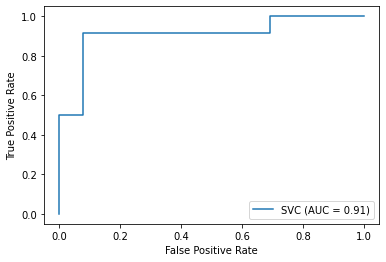

In [58]:
### IGNORE THIS CELL
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn import datasets, metrics, model_selection, svm
X, y = datasets.make_classification(random_state=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(            X, y, random_state=0)
clf = svm.SVC(random_state=0)
clf.fit(X_train, y_train)
X_train, X_test, y_train, y_test = model_selection.train_test_split(            X, y, random_state=0)
metrics.plot_roc_curve(clf, X_test, y_test)  # doctest: +SKIP
plt.show()

In [65]:
import numpy
numpy.set_printoptions(suppress=True)

In [63]:
MIN_X = 4
MAX_X = 8
MIN_Y = 0
MAX_Y = 3
x1 = iris_inputs[:,0]
x2 = iris_inputs[:,1]

In [61]:
def plot_areas_of_guess(model, xa, ya, xb, yb, xc, yc):
    # expanding the method I came up with in the synthetic logistic regression to 3 classes
    fig = matplotlib.pyplot.figure()
    fig.suptitle('Iris Data Set')
    matplotlib.pyplot.xlabel('sepal length')
    matplotlib.pyplot.ylabel('petal width')
    
    xp, yp = numpy.mgrid[MIN_X:MAX_X:100j, MIN_Y:MAX_Y:100j]
    xp = xp.flatten(order='F')
    yp = yp.flatten(order='F')
    
    predictions = model.predict(list(zip(xp, yp)))
    
    xap = xp[predictions==0]
    yap = yp[predictions==0]
    xbp = xp[predictions==1]
    ybp = yp[predictions==1]
    xcp = xp[predictions==2]
    ycp = yp[predictions==2]
    
    matplotlib.pyplot.plot(xap, yap, c="pink", zorder=1)
    matplotlib.pyplot.plot(xbp, ybp, c="turquoise", zorder=1)
    matplotlib.pyplot.plot(xcp, ycp, c="yellow", zorder=1)
    
    a_scatter = matplotlib.pyplot.scatter(xa, ya, c="red", marker="o", label='a', zorder=2)
    b_scatter = matplotlib.pyplot.scatter(xb, yb, c="blue", marker="^", label='b', zorder=2)
    c_scatter = matplotlib.pyplot.scatter(xc, yc, c="green", marker="D", label='c', zorder=2)

    matplotlib.pyplot.legend(handles=[a_scatter, b_scatter, c_scatter])

    matplotlib.pyplot.show()

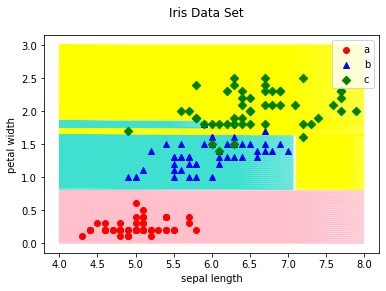

In [67]:
plot_areas_of_guess(model_subset, x1[:start_type_one], x2[:start_type_one], x1[start_type_one:start_type_two], x2[start_type_one:start_type_two], x1[start_type_two:], x2[start_type_two:])

The subset decision tree divides the areas into rectangles rather than areas between lines which the logistic regression does.

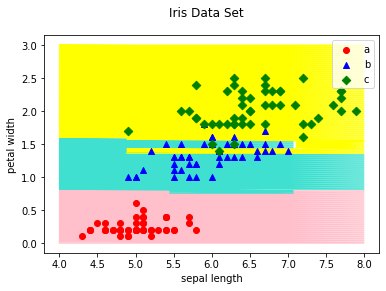

In [68]:
plot_areas_of_guess(model_forest, x1[:start_type_one], x2[:start_type_one], x1[start_type_one:start_type_two], x2[start_type_one:start_type_two], x1[start_type_two:], x2[start_type_two:])

The random forest does it in an even weirder way, which makes me wonder whether it is actually better than the simple decision tree.

In [74]:
subset_prediction = model_subset.predict(iris_inputs)
print('Decision tree success rate is', len(subset_prediction[subset_prediction==iris.target])/150)
forest_prediction = model_forest.predict(iris_inputs)
print('Random forest success rate is', len(forest_prediction[forest_prediction==iris.target])/150)

Decision tree success rate is 0.9733333333333334
Random forest success rate is 0.9733333333333334


I guess that extra computing didn't help much in this case, although I would argue that both models were doomed from the start because 4 points had the same characteristics but different classes.